In [1]:
!kaggle competitions download -c fake-news # downloading data from kaggle
!unzip fake-news.zip -d fake-news-data # unzipping data

fake-news.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fake-news.zip
replace fake-news-data/submit.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
submit_df = pd.read_csv("fake-news-data/submit.csv",index_col="id")
submit_df.head()

,label
id,
20800,0
20801,1
20802,0
20803,1
20804,1


In [5]:
test_df = pd.read_csv("fake-news-data/test.csv",index_col="id")
test_df.head()

,title,author,text
id,,,
20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [3]:

train_df = pd.read_csv("fake-news-data/train.csv", index_col="id")
train_df.head()

train_df = train_df.dropna()

(array([10361.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7924.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

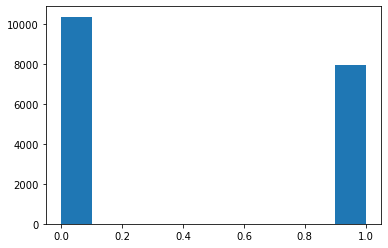

In [7]:
plt.hist(train_df["label"],)

# Bag of Words Approach

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english",ngram_range=(1,1))
X = vectorizer.fit_transform(train_df["title"]).todense()
Y = train_df["label"]
pd.DataFrame(data=X,columns=vectorizer.get_feature_names_out())


,000,004,00pm,01,02,04,06,07,09,09l,...,مفاهيمية,مقاومة,مورد,ميسان,ناخوداگاه,نحو,وزارة,يمنع,کدآمایی,俄罗斯总统观注
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score

def model_n_score(Model):
    model = Model()
    model.fit(X,Y)
    Y_hat = model.predict(X)

    f1 = f1_score(Y,Y_hat)
    return f1

models = [GaussianNB,KNeighborsClassifier,SVC,RandomForestClassifier]
scores = [model_n_score(i) for i in models]

/Users/benjamingardiner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/benjamingardiner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/benjamingardiner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/

In [ ]:
from sklearn.decomposition import PCA
from numpy.linalg import svd

u, s, vh = np.linalg.svd(X, full_matrices=True)
plt.plot(s)

In [ ]:
plt.bar(models,scores)

0.8514159815143211
